## IE — Indicator Explorer: инструмент для работы с данными статистических показателей

In [1]:
# !pip install seaborn

In [2]:
import pandas as pd
from explorer import *

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

Настоящий .ipynb подготовлен как вспомогательный инструмент для работы с данными статистичеких показателей на примере [набора данных "Демография в России: объединенные панельные данные за 1990-2019 годы"](https://data-in.ru/data-catalog/datasets/164/), опубликованном на платформе Инфраструктура научно-исследовательских данных.

## 1. О наборе данных "Демография в России: объединенные панельные данные за 1990-2019 годы"

Набор данных содержит две плоские таблицы: панельные данные со значениями статистических показателей `data.csv` и справочник кодировок методологии `methodology.csv`.

In [4]:
data = pd.read_csv('data.csv', dtype=DTYPES)
methodology = pd.read_csv('methodology.csv')

**Таблица с панельными данными** содержит 24 атрибута, 12 из них — разрезы, в которых собирался тот или иной статистический показатель. Каждая строка в панельных данных представляет собой характеристику одного объекта наблюдения в указанный период времени (год или год и месяц).

In [5]:
# панельные данные на примере первых пяти строк датасета

data.head()

id                                             object_name object_okato  \
0   1                                          Алтайский край  01000000000   
1   2                                        Амурская область  10000000000   
2   3                                   Архангельская область  11000000000   
3   4  Архангельская область без Ненецкого автономного округа          NaN   
4   5                                    Астраханская область  12000000000   

  object_oktmo  year indicator_name indicator_unit original_unit area_type  \
0  01000000000  2012  Число городов        единица       единица       NaN   
1  10000000000  2012  Число городов        единица       единица       NaN   
2  11000000000  2012  Число городов        единица       единица       NaN   
3          NaN  2012  Число городов        единица       единица       NaN   
4  12000000000  2012  Число городов        единица       единица       NaN   

  age_group  year_of_birth  sex month birth_order mother_marital_status  \
0       NaN            NaN  NaN   NaN         NaN                   NaN   
1       NaN            NaN  NaN   NaN         NaN                   NaN   
2       NaN            NaN  NaN   NaN         NaN                   NaN   
3       NaN            NaN  NaN   NaN         NaN                   NaN   
4       NaN            NaN  NaN   NaN         NaN                   NaN   

  death_cause bride_age groom_age country migration_direction  \
0         NaN       NaN       NaN     NaN                 NaN   
1         NaN       NaN       NaN     NaN                 NaN   
2         NaN       NaN       NaN     NaN                 NaN   
3         NaN       NaN       NaN     NaN                 NaN   
4         NaN       NaN       NaN     NaN                 NaN   

   indicator_value  original_accuracy methodology                  notes  
0             12.0                0.0         NaN  На 1 января 2012 года  
1              9.0                0.0         NaN  На 1 января 2012 года  
2             14.0                0.0         NaN  На 1 января 2012 года  
3             13.0                0.0         NaN  На 1 января 2012 года  
4              6.0                0.0         NaN  На 1 января 2012 года

In [18]:
# панельные данные по заданному показателю и разрезу

data[(data['indicator_name'] == 'Число умерших по причинам смерти') &
     (data['death_cause'] == 'ишемическая болезнь сердца')].tail()

id                   object_name object_okato object_oktmo  \
6155817  6155818    Корякский автономный округ          NaN          NaN   
6155818  6155819           Магаданская область  44000000000  44000000000   
6155819  6155820           Сахалинская область  64000000000  64000000000   
6155820  6155821  Еврейская автономная область  99000000000  99000000000   
6155821  6155822    Чукотский автономный округ  77000000000  77000000000   

         year                    indicator_name indicator_unit original_unit  \
6155817  1993  Число умерших по причинам смерти        человек       человек   
6155818  1993  Число умерших по причинам смерти        человек       человек   
6155819  1993  Число умерших по причинам смерти        человек       человек   
6155820  1993  Число умерших по причинам смерти        человек       человек   
6155821  1993  Число умерших по причинам смерти        человек       человек   

                   area_type     age_group  year_of_birth      sex month  \
6155817  городское население  все возраста            NaN  женщины   NaN   
6155818  городское население  все возраста            NaN  женщины   NaN   
6155819  городское население  все возраста            NaN  женщины   NaN   
6155820  городское население  все возраста            NaN  женщины   NaN   
6155821  городское население  все возраста            NaN  женщины   NaN   

        birth_order mother_marital_status                 death_cause  \
6155817         NaN                   NaN  ишемическая болезнь сердца   
6155818         NaN                   NaN  ишемическая болезнь сердца   
6155819         NaN                   NaN  ишемическая болезнь сердца   
6155820         NaN                   NaN  ишемическая болезнь сердца   
6155821         NaN                   NaN  ишемическая болезнь сердца   

        bride_age groom_age country migration_direction  indicator_value  \
6155817       NaN       NaN     NaN                 NaN             17.0   
6155818       NaN       NaN     NaN                 NaN            254.0   
6155819       NaN       NaN     NaN                 NaN            696.0   
6155820       NaN       NaN     NaN                 NaN            245.0   
6155821       NaN       NaN     NaN                 NaN             23.0   

         original_accuracy  methodology  \
6155817                0.0  mortality_1   
6155818                0.0  mortality_1   
6155819                0.0  mortality_1   
6155820                0.0  mortality_1   
6155821                0.0  mortality_1   

                                                               notes  
6155817  С 1990 по 1998 годы причины смерти разрабатывались по МКБ-9  
6155818  С 1990 по 1998 годы причины смерти разрабатывались по МКБ-9  
6155819  С 1990 по 1998 годы причины смерти разрабатывались по МКБ-9  
6155820  С 1990 по 1998 годы причины смерти разрабатывались по МКБ-9  
6155821  С 1990 по 1998 годы причины смерти разрабатывались по МКБ-9

При подготовке `data.csv` проведены **обработка и обогащение данных**:
- для категориальных переменных унифицированы названия категорий:  
    - названия страны, федеральных округов, экономических районов, субъектов РФ, городов приведены к эталонному виду с использованием библиотек, рассчитывающих расстояние Левенштейна (редакционное расстояние);  
    - названия категорий по разрезам заменялись мэппингом, например:
<p style="text-align: center;">"сельская местность", "сельские поселения", "сельское население", "село" &#8594; "сельское население"</p>
<br>
- пропуски в полях единиц измерений `indicator_unit`, `original_unit` заполнены вручную, на основе информации о методологии сбора данных по соответствующим показателям;
- данные обогащены кодами ОКТМО и ОКАТО, где это было возможно;
- в поле `original_accuracy` проставлена точность значений — число знаков после запятой в источнике данных.

Для выборочных показателей проведена **проверка значений** по суммирующимся категориям. Например, для показателя *\"Численность населения на 1 января\"* проверялось (и оказалось верным!) равенство значений по категориям:
<p style="text-align: center;">мужчины и женщины, все возраста == мужчины, все возраста + женщины, все возраста</p>

Полные **дубликаты** (совпадения содержимого строк по всем полям, кроме `id`) отсутствуют.

___
**Справочник по методологии** содержит код и краткое описание методологии сбора данных Росстатом и, таким образом, проливает свет на природу данных и возможные скачки значений показателей на временных рядах. Коды методологии проставлены и в таблице `data.csv` — так исследователь всегда сможет обратиться к описанию методологии, стоящей за конкретной цифрой в панельных данных.

In [7]:
methodology

id          code  \
0   1  population_1   
1   2  population_2   
2   3   mortality_1   
3   4   mortality_2   
4   5    marriage_1   
5   6    marriage_2   
6   7   migration_1   
7   8   migration_2   

                                                                                                                                                                                                                                                                                                                                                                                                           description  
0                                                       Первоисточником получения сведений о населении являются переписи населения. В межпереписные годы данные о численности получают расчётным путем с учетом естественного и миграционного приростов, а также административно-территориальных преобразований в течение предыдущего года. Расчет численности населения ведется по наличному и постоянному населению.  
1                                                            Первоисточником получения сведений о населении являются переписи населения. В межпереписные годы данные о численности получают расчётным путем с учетом естественного и миграционного приростов, а также административно-территориальных преобразований в течение предыдущего года. Расчет численности населения ведется только по постоянному населению.  
2                                                                                                                                                                                До 01.10.2018 Росстат разрабатывал данные о естественном движении населения на основании форм федерального статистического наблюдения, предоставляемых органами ЗАГС субъектов Российской Федерации в территориальные органы Росстата  
3                                                                                                                                                                                                                                                          C 2018 года Росстат получает данные о рождаемости и смертности напрямую из Единого государственного реестра записей актов гражданского состояния (ЕГР ЗАГС)  
4                                                                                                                                                                                              До 01.10.2018 Росстат разрабатывал данные о браках и разводах на основании форм федерального статистического наблюдения, предоставляемых органами ЗАГС субъектов Российской Федерации в территориальные органы Росстата  
5                                                                                                                                                                                                                                                                 C 2018 года Росстат получает данные о браках и разводах напрямую из Единого государственного реестра записей актов гражданского состояния (ЕГР ЗАГС)  
6  До 2019 года Росстат получал данные о прибытии, выбытии через листки статистического учета прибытия и листки статистического учета выбытия, заполняемые региональными подразделениями МВД (Приложение № 12 Административного регламента предоставления услуги по регистрационному учету граждан Российской Федерации по месту пребывания и по месту жительства в пределах Российской Федерации, формы №№ 12П и 12В)  
7                                                                                                                                                                                                                                                                  C 2019 года Росстат получает данные о прибытии и выбытии через формы федерального статистического наблюдения: 1-ПРИБ, 1-ВЫБ, 1-ПРИБ_ИнГР,1-ВЫБ_ИнГр

### 2. Декодирование метки методологии сбора данных

Предложенные ниже функции `map_description` и `unmap_description` позволяют менять код методологии на ее описание и обратно. Функциям нужно передать параметр `where` — объект типа pandas.DataFrame, содержащий панельные данные, и параметр `source` — объект типа pandas.DataFrame, содержащий коды методологий и их описание.

In [8]:
# строка датафрейма до мэппинга

data[data.index == 100000]

id           object_name object_okato object_oktmo  year  \
100000  100001  Республика Ингушетия  26000000000  26000000000  2012   

                           indicator_name indicator_unit original_unit  \
100000  Численность населения на 1 января        человек       человек   

                             area_type age_group  year_of_birth      sex  \
100000  городское и сельское население   22 года            NaN  женщины   

       month birth_order mother_marital_status death_cause bride_age  \
100000   NaN         NaN                   NaN         NaN       NaN   

       groom_age country migration_direction  indicator_value  \
100000       NaN     NaN                 NaN           5239.0   

        original_accuracy                             methodology notes  
100000                0.0  population_2, mortality_1, migration_1   NaN

In [9]:
map_description(where=data, source=methodology)

In [10]:
# посмотреть результат работы функции на одной строке датафрейма

data[data.index == 100000]

id           object_name object_okato object_oktmo  year  \
100000  100001  Республика Ингушетия  26000000000  26000000000  2012   

                           indicator_name indicator_unit original_unit  \
100000  Численность населения на 1 января        человек       человек   

                             area_type age_group  year_of_birth      sex  \
100000  городское и сельское население   22 года            NaN  женщины   

       month birth_order mother_marital_status death_cause bride_age  \
100000   NaN         NaN                   NaN         NaN       NaN   

       groom_age country migration_direction  indicator_value  \
100000       NaN     NaN                 NaN           5239.0   

        original_accuracy  \
100000                0.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  methodology  \
100000  Первоисточником получения сведений о населении являются переписи населения. В межпереписные годы данные о численности получают расчётным путем с учетом естественного и миграционного приростов, а также административно-территориальных преобразований в течение предыдущего года. Расчет численности населения ведется только по постоянному населению.\nДо 01.10.2018 Росстат разрабатывал данные о естественном движении населения на основании форм федерального статистического наблюдения, предоставляемых органами ЗАГС субъектов Российской Федерации в территориальные органы Росстата\nДо 2019 года Росстат получал данные о прибытии, выбытии через листки статистического учета прибытия и листки статистического учета выбытия, заполняемые региональными подразделениями МВД (Приложение № 12 Административного регламента предоставления услуги по регистрационному учету граждан Российской Федерации по месту пребывания и по месту жительства в пределах Российской Федерации, формы №№ 12П и 12В)   

       notes  
100000   NaN

In [11]:
unmap_description(where=data, source=methodology)

In [12]:
# посмотреть результат работы функции на одной строке датафрейма

data[data.index == 1000]

id                 object_name object_okato object_oktmo  year  \
1000  1001  Республика Адыгея (Адыгея)  79000000000  79000000000  2013   

                                      indicator_name indicator_unit  \
1000  Число городов с числом жителей до 3000 человек        единица   

     original_unit area_type age_group  year_of_birth  sex month birth_order  \
1000       единица       NaN       NaN            NaN  NaN   NaN         NaN   

     mother_marital_status death_cause bride_age groom_age country  \
1000                   NaN         NaN       NaN       NaN     NaN   

     migration_direction  indicator_value  original_accuracy  \
1000                 NaN              0.0                0.0   

                                 methodology                  notes  
1000  population_2, mortality_1, migration_1  На 1 января 2013 года

### 2. Экспресс-визуализация временных рядов 

Функция `show_lineplot` создает сетку из графиков, отражающих динамику изменения одного показателя для всех доступных объектов наблюдения. Функция работает на основе `seaborn.lineplot` и не поддерживает обширную кастомизацию, но подходит для целей ознакомления с временными рядами по показателям и разрезам.

Передаваемые в `show_lineplot` параметры:
- `df` — датасет с панельными данными, для которого будут формироваться временные ряды. Объект типа pandas.DataFrame. Мы предлагаем передавать уже отфильтрованные данные по желаемому показателю;
- `ncols` — целое число колонок в сетке графиков, по умолчанию 4;
- `width` — ширина сетки графиков в дюймах, по умолчанию 22;
- `row_height` — высота ряда в сетке в дюймах, по умолчанию 4;
- `hue` — название разреза (соответствующего поля в датасете), категории по которому на графиках будут отображены линиями различного цвета; по умолчанию None;
- `style` — название разреза (соответствующего поля в датасете), категории по которому на графиках будут отображены маркерами различного типа; по умолчанию None;
- `fixed` — название разреза (соответствующего поля в датасете), категории по которому не должны быть отображены на графиках, но должны быть зафиксированы в названии рисунка вместе с названием показателя; по умолчанию None;
- `legend` — None или "auto", по умолчанию None. В случае `legend`=None легенда не будет отображаться на графике. В случае `legend`="auto" легенда будет создана автоматически и помещена в левый верхний угол графика. Чтобы легенда не мешала просмотру временных рядов, рекомендуем включать легенду при небольшом числе столбцов в сетке графиков.

Обращаем внимание, что максимум два разреза могут быть одновременно отображены на графиках — те, что заданы с помощью параметров `hue` и `style`. Если показатель представлен по большему числу разрезов, необходимо закрепить одну из категорий разреза, не упомянутого в `hue` и `style`, в передаваемом датасете `df`.

Примеры работы функции с разными параметрами приведены ниже.

In [13]:
# пример визуализации временных рядов для показателя без разрезов

df = data[(data['indicator_name'] == 'Число прерываний беременности')]

show_lineplot(df)

In [14]:
# пример визуализации временных рядов для показателя без разрезов

df = data[(data['indicator_name'] == 'Численность населения городов с числом жителей 100 тысяч человек и более') &
          (data['object_name'].isin(['Владикавказ', 'Липецк', 'Сыктывкар']))]

show_lineplot(df, ncols=3, width=16)

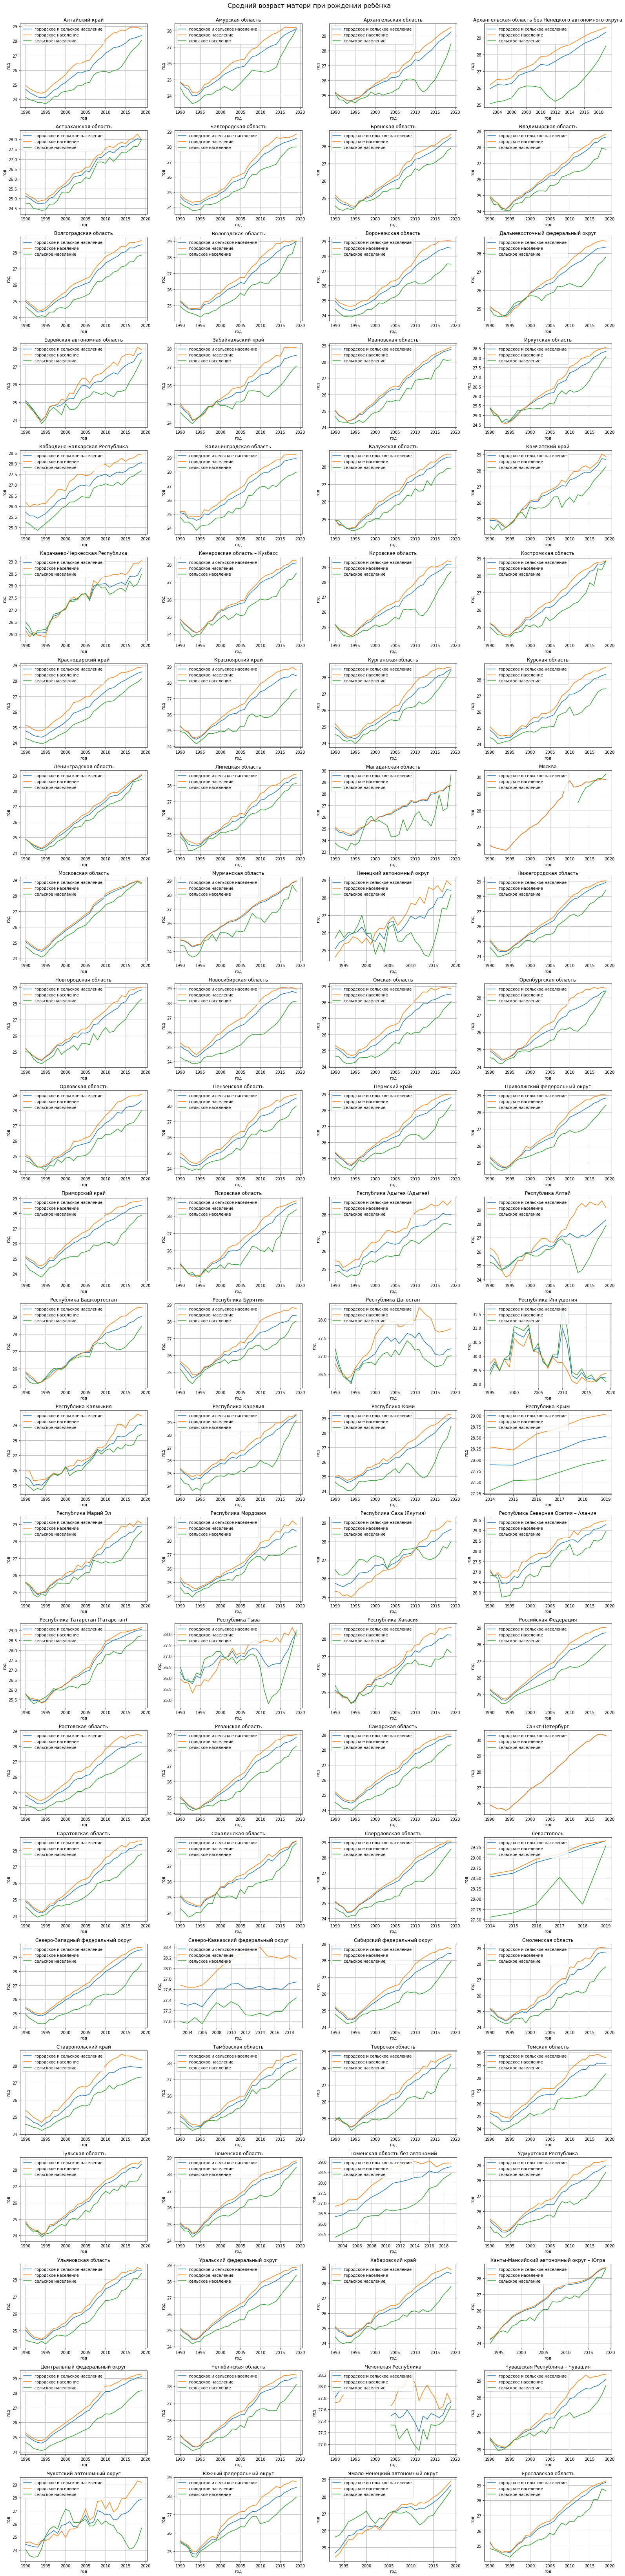

In [15]:
# пример визуализации временных рядов для показателя с одним разрезом

df = data[data['indicator_name'] == 'Средний возраст матери при рождении ребёнка']

show_lineplot(df, hue='area_type', legend='auto')

In [16]:
# пример визуализации временных рядов для показателя с двумя разрезами

df = data[(data['indicator_name'] == 'Международная миграция — число выбывших') &
          (data['country'].isin(['США', 'Китай', 'Франция']))]

show_lineplot(df, ncols=1, width=6, row_height=6, hue='country', style='area_type', legend='auto')

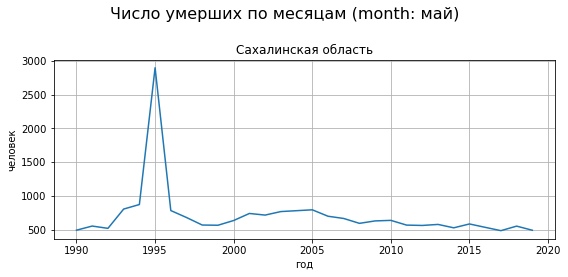

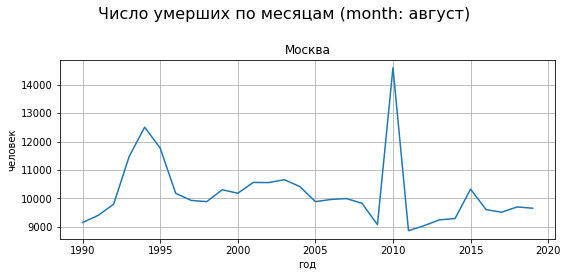

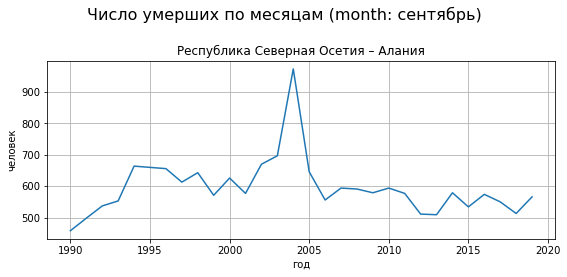

In [17]:
# пример визуализации временных рядов для показателя с двумя разрезами и фиксированным третьим разрезом

df = data[((data['indicator_name'] == 'Число умерших по месяцам') &
           (data['area_type'] == 'городское и сельское население') &
           (data['sex'] == 'мужчины и женщины') &
           (((data['object_name'] == 'Сахалинская область') & (data['month'] == 'май')) |
           ((data['object_name'] == 'Москва') & (data['month'] == 'август')) |
           ((data['object_name'] == 'Республика Северная Осетия – Алания') & (data['month'] == 'сентябрь'))))]

for month in ['май', 'август', 'сентябрь']:
    df_ = df[df['month'] == month]
    show_lineplot(df_, ncols=1, width=8, fixed='month')